In [1]:
!pip install networkx

In [3]:
!pip install geopandas

     |████████████████████████████████| 972kB 3.2MB/s 
     |████████████████████████████████| 10.9MB 7.0MB/s 
     |████████████████████████████████| 14.7MB 319kB/s 


In [4]:
from collections import defaultdict
import math
from heapq import heapify, heappush, heappop
import networkx as nx
import geopandas as gpd

In [3]:
# utility: priority queue
class Pq:
    def __init__(self):
        self.queue = []
        
    def __str__(self):                                                          # 문자열화 함수.  
        return str(self.queue)
        
    def insert(self, item):
        heappush(self.queue, item)
    
    def extract_min(self):
        return heappop(self.queue)[1]
    
    def update_priority(self, key, priority):
        for v in self.queue:
            if v[1] == key:
                v[0] = priority 
        heapify(self.queue)
    
    def empty(self):
        return len(self.queue) == 0
# utility: Graph
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(lambda: [])
    
    def add_edge(self, v, u, w):
        self.graph[v].append((u, w))
        
    def __str__(self):
        result = ''
        for v in self.V:
            result += f'{v}: {str(self.graph[v])}, \n'
        return result


In [19]:
def dijkstra(graph, s):
    Q = Pq() # priority queue of vertices
    		 # [ [distance, vertex], ... ]
 
    d = dict.fromkeys(graph.V, math.inf) # distance pair 
                                         # will have default value of Infinity
                                         
    pi = dict.fromkeys(graph.V, None) # map of parent vertex
    								  # useful for finding shortest path	
    
    thepath = dict.fromkeys(graph.V, '')
    print(thepath)
    # initialize
    d[s] = 0
    
    # update priority if prior path has larger distance
    def relax(u, v, w):
        if d[v] > d[u] + w:
            d[v] = d[u] + w
            Q.update_priority(v, d[v])
            pi[v] = u
            thepath[v] +=  u

    
    # initialize queue
    for v in graph.V:
        Q.insert([d[v], v])
    
    while not Q.empty():
        u = Q.extract_min()
        for v, w in graph.graph[u]:
            relax(u, v, w)
    
    print('pi',pi)
    print('thepath',thepath)
    return d, pi

def shortest_path(s, t):
    d, pi = dijkstra(g,s)
    path = [t]
    print(path)
    current = t
    
    # if parent pointer is None,
    # then it's the source vertex
    while pi[current]:
        path.insert(0, pi[current])
        # set current to parent
        current = pi[current]
        
    if s not in path:
        return f'unable to find shortest path staring from "{s}" to "{t}"'
    
    return f'{" > ".join(path)}'

In [6]:
g = Graph(['A', 'B', 'C', 'D', 'E'])

g.add_edge('A', 'B', 10)
g.add_edge('A', 'C', 3)
g.add_edge('B', 'C', 1)
g.add_edge('C', 'B', 4)
g.add_edge('B', 'D', 2)
g.add_edge('C', 'D', 8)
g.add_edge('D', 'E', 7)
g.add_edge('E', 'D', 9)
g.add_edge('C', 'E', 2)

{'A': '', 'B': '', 'C': '', 'D': '', 'E': ''}
pi {'A': None, 'B': 'C', 'C': 'A', 'D': 'B', 'E': 'C'}
thepath {'A': '', 'B': 'AC', 'C': 'A', 'D': 'CB', 'E': 'C'}
['E']
A > C > E


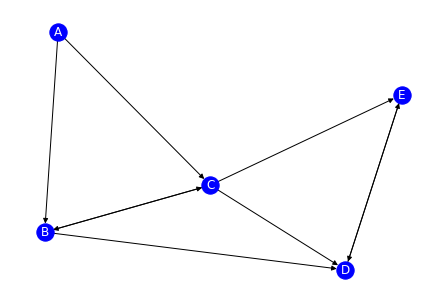

In [20]:
print(shortest_path('A', 'E'))

G = nx.DiGraph()
G.add_weighted_edges_from([
    ('A', 'B', 10), ('A', 'C', 3), ('B', 'C', 1), ('C', 'B', 4), 
    ('B', 'D', 2), ('C', 'D', 8), ('D', 'E', 7), ('E', 'D', 9), ('C', 'E', 2)])
nx.draw(G, with_labels = True, node_color='b', font_color='w')

In [21]:
X = nx.shortest_simple_paths(G, 'A', 'E')
k = 5
for counter, path in enumerate(X):
     print(path)
     if counter == k-1:
         break

['A', 'C', 'E']
['A', 'B', 'D', 'E']
['A', 'C', 'D', 'E']
['A', 'B', 'C', 'E']
['A', 'C', 'B', 'D', 'E']


In [ ]:
geodata = gpd.read_file('/content/drive/My Drive/hakerton/Node_CAR_Mobility_Analyzer/Node_Level6 Map_2018_UTMK.shp')
geodata.head()

In [7]:
seoul_node = geodata[geodata['sido_id']=='11000']

In [8]:
seoul_node.to_file('seoulnode.shp')

In [9]:
seoul_nodes = nx.read_shp('/content/seoulnode.shp')


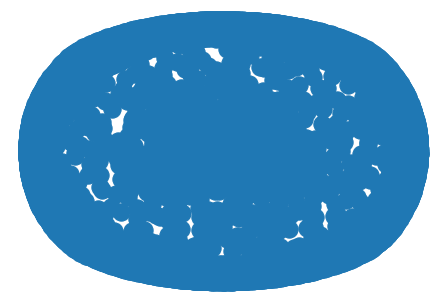

In [15]:
nx.draw(seoul_nodes)